# HackUPC: HP Inventory Forecasting

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
rand_val = 765

In [2]:
path = 'data/'

In [3]:
df = pd.read_csv(f'{path}train.csv')

In [4]:
df.head()

id        date  year_week  product_number  reporterhq_id  \
0  202119-6909  2021-05-15     202119            6909             93   
1  202120-6909  2021-05-22     202120            6909             93   
2  202121-6909  2021-05-29     202121            6909             93   
3  202122-6909  2021-06-05     202122            6909             93   
4  202123-6909  2021-06-12     202123            6909             93   

  prod_category  specs  display_size  segment  sales_units  inventory_units  
0         Arale  21274          13.3  Premium          2.0             35.0  
1         Arale  21274          13.3  Premium          0.0             70.0  
2         Arale  21274          13.3  Premium          3.0            137.0  
3         Arale  21274          13.3  Premium          0.0            274.0  
4         Arale  21274          13.3  Premium          0.0            333.0

In [5]:
df.shape

(15454, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15454 entries, 0 to 15453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15454 non-null  object 
 1   date             15454 non-null  object 
 2   year_week        15454 non-null  int64  
 3   product_number   15454 non-null  int64  
 4   reporterhq_id    15454 non-null  int64  
 5   prod_category    15454 non-null  object 
 6   specs            15454 non-null  int64  
 7   display_size     15454 non-null  float64
 8   segment          15454 non-null  object 
 9   sales_units      14963 non-null  float64
 10  inventory_units  14961 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.3+ MB


In [7]:
df.loc[(pd.isna(df.sales_units)) | (pd.isna(df.inventory_units))].sort_values(by = ['year_week']).head(25)

id        date  year_week  product_number  reporterhq_id  \
13482  201919-233919  2019-05-11     201919          233919              3   
13487  201921-233919  2019-05-25     201921          233919             24   
13498  201927-233919  2019-07-06     201927          233919              3   
13521  201938-233919  2019-09-21     201938          233919             24   
13520  201938-233919  2019-09-21     201938          233919              3   
13552  202002-233919  2020-01-11     202002          233919              3   
13564  202008-233919  2020-02-22     202008          233919              3   
14145  202016-235893  2020-04-18     202016          235893             24   
13584  202018-233919  2020-05-02     202018          233919              3   
14160  202031-235893  2020-08-01     202031          235893             24   
13613  202032-233919  2020-08-08     202032          233919             24   
13626  202039-233919  2020-09-26     202039          233919              3   
14177  202048-235893  2020-11-28     202048          235893             24   
15153  202049-247737  2020-12-05     202049          247737             24   
13663  202104-233919  2021-01-30     202104          233919             24   
468      202108-9870  2021-02-27     202108            9870             12   
469      202109-9870  2021-03-06     202109            9870             12   
13677  202111-233919  2021-03-20     202111          233919             24   
13920  202112-234906  2021-03-27     202112          234906             12   
980     202113-12831  2021-04-03     202113           12831             12   
13684  202115-233919  2021-04-17     202115          233919              3   
2043    202116-32571  2021-04-24     202116           32571             24   
15195  202117-247737  2021-05-01     202117          247737             24   
14741  202119-239841  2021-05-15     202119          239841             93   
630     202120-10857  2021-05-22     202120           10857             12   

      prod_category   specs  display_size  segment  sales_units  \
13482        Clover  106370          15.6     Core         10.0   
13487        Clover  106370          15.6     Core          NaN   
13498        Clover  106370          15.6     Core         91.0   
13521        Clover  106370          15.6     Core          NaN   
13520        Clover  106370          15.6     Core          NaN   
13552        Clover  106370          15.6     Core          NaN   
13564        Clover  106370          15.6     Core         36.0   
14145        Clover   50284          17.3     Core          1.0   
13584        Clover  106370          15.6     Core          NaN   
14160        Clover   50284          17.3     Core          8.0   
13613        Clover  106370          15.6     Core          1.0   
13626        Clover  106370          15.6     Core          NaN   
14177        Clover   50284          17.3     Core          NaN   
15153         Arale   10637          13.3  Premium          3.0   
13663        Clover  106370          15.6     Core          0.0   
468        Doraemon  107337          15.6   Gaming         21.0   
469        Doraemon  107337          15.6   Gaming          NaN   
13677        Clover  106370          15.6     Core          NaN   
13920          Goku  111205          15.6   Gaming          0.0   
980        Doraemon  180829          15.6   Gaming          NaN   
13684        Clover  106370          15.6     Core          NaN   
2043         Clover  221443          15.6     Core          NaN   
15195         Arale   10637          13.3  Premium          NaN   
14741          Goku   95733          15.6     Core          NaN   
630        Doraemon  108304          15.6   Gaming          NaN   

       inventory_units  
13482              NaN  
13487            214.0  
13498              NaN  
13521             57.0  
13520             63.0  
13552             25.0  
13564              NaN  
14145              NaN  
13584              1.

In [8]:
df.loc[(pd.isna(df.sales_units)) & (pd.isna(df.inventory_units))].sort_values(by = ['year_week']).head(25)

id        date  year_week  product_number  reporterhq_id  \
1468    202124-24675  2021-06-19     202124           24675             24   
10645  202208-187530  2022-02-26     202208          187530             78   
12859  202225-221088  2022-06-25     202225          221088             78   
3533    202236-51324  2022-09-10     202236           51324             21   
4341    202244-64155  2022-11-05     202244           64155             12   
3569    202249-51324  2022-12-10     202249           51324             15   
9534   202313-167790  2023-04-01     202313          167790             24   
2030    202317-30597  2023-04-29     202317           30597              3   

      prod_category   specs  display_size  segment  sales_units  \
1468          Conan    4835          13.3  Premium          NaN   
10645        Bobobo  142149          16.1   Gaming          NaN   
12859      Doraemon   37713          16.1   Gaming          NaN   
3533           Goku  168258          15.6     Core          NaN   
4341         Clover  121842          14.0     Core          NaN   
3569           Goku  168258          15.6     Core          NaN   
9534           Goku   58987          17.3   Gaming          NaN   
2030         Clover  195334          15.6     Core          NaN   

       inventory_units  
1468               NaN  
10645              NaN  
12859              NaN  
3533               NaN  
4341               NaN  
3569               NaN  
9534               NaN  
2030               NaN

In [9]:
df = df.loc[~(pd.isna(df.sales_units)) & ~(pd.isna(df.inventory_units))].sort_values(by = ['year_week'])

- We have about 976 nulls from sales_units and inventory_units
- 8 cases where both are null, and 968 where only one of them are null
- Wont drop for now, as we might be able to interpolate

In [10]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [11]:
df['week'] = df['year_week'].astype('str').str[-2:]
df['year'] = df['year_week'].astype('str').str[:-2]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 13476 to 15453
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14478 non-null  object        
 1   date             14478 non-null  datetime64[ns]
 2   year_week        14478 non-null  int64         
 3   product_number   14478 non-null  int64         
 4   reporterhq_id    14478 non-null  int64         
 5   prod_category    14478 non-null  object        
 6   specs            14478 non-null  int64         
 7   display_size     14478 non-null  float64       
 8   segment          14478 non-null  object        
 9   sales_units      14478 non-null  float64       
 10  inventory_units  14478 non-null  float64       
 11  week             14478 non-null  object        
 12  year             14478 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.5+ MB


In [13]:
df.describe()

year_week  product_number  reporterhq_id          specs  \
count   14478.000000    14478.000000   14478.000000   14478.000000   
mean   202240.919809   127111.665562      42.032739  112407.304669   
std        61.643873    77427.684132      34.864066   63754.223010   
min    201915.000000     6909.000000       3.000000     967.000000   
25%    202218.000000    58233.000000      15.000000   58987.000000   
50%    202239.000000   116466.000000      24.000000  109271.000000   
75%    202304.000000   196413.000000      78.000000  157621.000000   
max    202318.000000   247737.000000      96.000000  236915.000000   

       display_size   sales_units  inventory_units  
count  14478.000000  14478.000000     14478.000000  
mean      15.159525     26.002625        71.749482  
std        1.422528     29.398877        66.317573  
min       11.000000      0.000000         0.000000  
25%       14.000000      3.000000        26.000000  
50%       15.600000     16.000000        56.000000  
75%       15.600000     38.000000        97.000000  
max       17.300000    186.000000       399.000000

In [14]:
print(f'\nTotal number of unique products: {len(df.product_number.unique())}')
print(f'\nTotal number of unique product categories: {len(df.prod_category.unique())}')
print(f'\nTotal number of unique segments: {len(df.segment.unique())}')
print(f'\nTotal number of unique weeks: {len(df.week.unique())}')
print(f'\nTotal number of unique years: {len(df.year.unique())}')


Total number of unique products: 100

Total number of unique product categories: 7

Total number of unique segments: 3

Total number of unique weeks: 53

Total number of unique years: 5


In [15]:
prod_freq = df.groupby(['product_number'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'count', ascending = False)

prod_freq.product_number = prod_freq.product_number.astype('str')

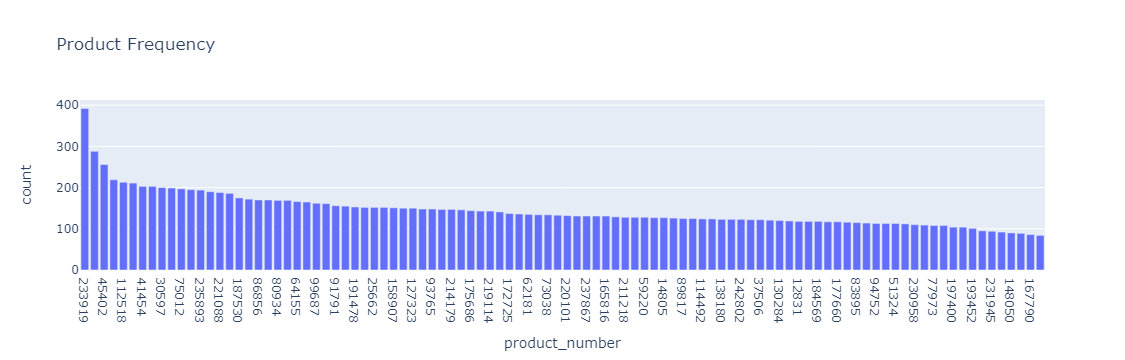

In [16]:
fig = px.bar(
    prod_freq, 
    x = 'product_number', 
    y = 'count',
    title = 'Product Frequency'
)

fig.show()

In [17]:
prod_cat_freq = df.groupby(['prod_category'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'count', ascending = False)

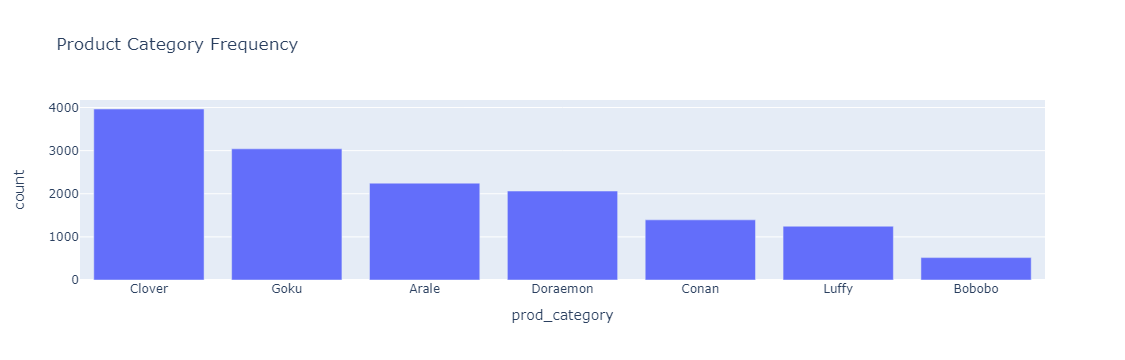

In [18]:
fig = px.bar(
    prod_cat_freq, 
    x = 'prod_category', 
    y = 'count',
    title = 'Product Category Frequency'
)

fig.show()

In [19]:
segment_freq = df.groupby(['segment'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'count', ascending = False)

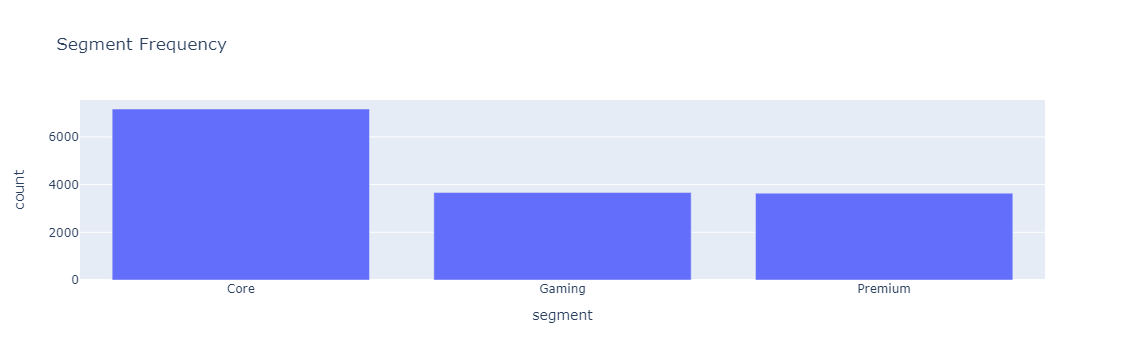

In [20]:
fig = px.bar(
    segment_freq, 
    x = 'segment', 
    y = 'count',
    title = 'Segment Frequency'
)

fig.show()

In [21]:
venders_per_product = df[['product_number', 'reporterhq_id']].drop_duplicates().groupby(['product_number'])['reporterhq_id'].count(
).reset_index().rename(columns = {'reporterhq_id': 'count'}).sort_values(by = 'count', ascending = False)

venders_per_product.product_number = venders_per_product.product_number.astype('str')

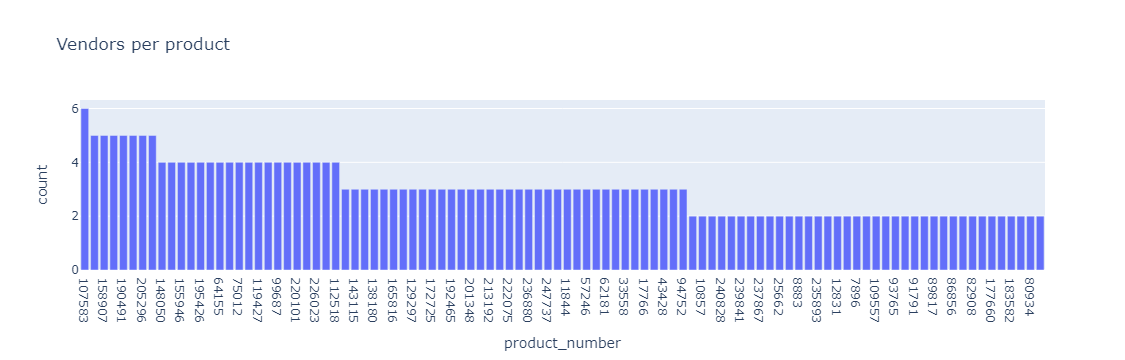

In [22]:
fig = px.bar(
    venders_per_product, 
    x = 'product_number', 
    y = 'count',
    title = 'Vendors per product'
)

fig.show()

In [23]:
week = df.groupby(['week'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'week', ascending = True)

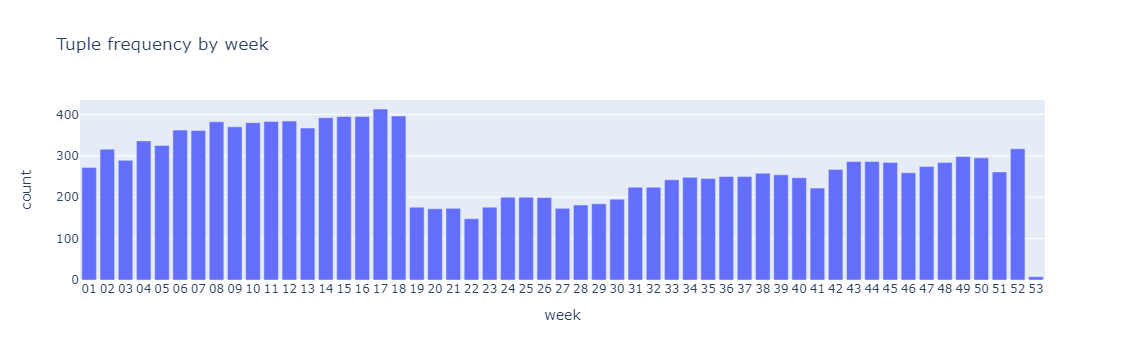

In [24]:
fig = px.bar(
    week, 
    x = 'week', 
    y = 'count',
    title = 'Tuple frequency by week'
)

fig.show()

In [25]:
year = df.groupby(['year'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'year', ascending = True)

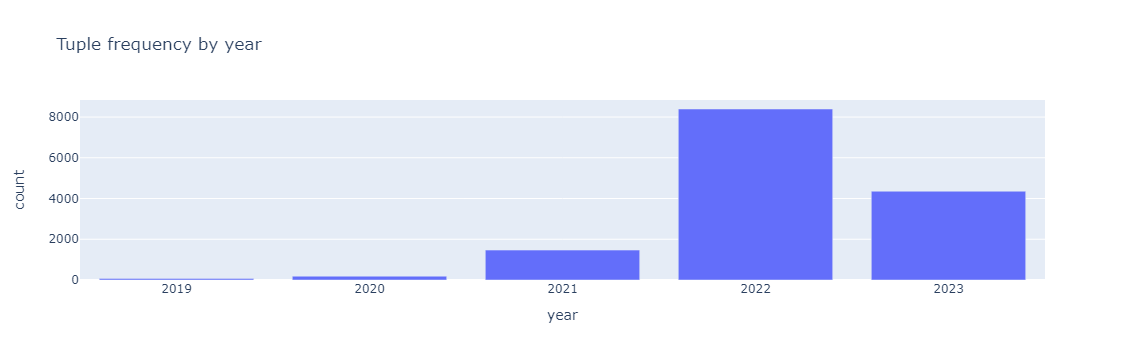

In [26]:
fig = px.bar(
    year, 
    x = 'year', 
    y = 'count',
    title = 'Tuple frequency by year'
)

fig.show()

In [27]:
year_ex_vendors = df[['id', 'date', 'product_number', 'year']].drop_duplicates().groupby(['year'])['id'].count().reset_index().rename(columns = {'id': 'count'}).sort_values(by = 'year', ascending = True)

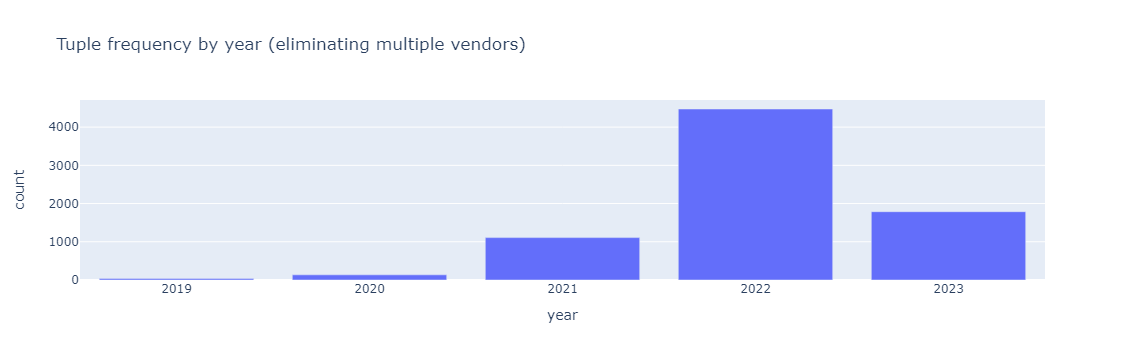

In [28]:
fig = px.bar(
    year_ex_vendors, 
    x = 'year', 
    y = 'count',
    title = 'Tuple frequency by year (eliminating multiple vendors)'
)

fig.show()

In [29]:
df.year = df.year.astype('int32')
df = df.loc[df.year >= 2021]

In [30]:
df2 = df.loc[~(pd.isna(df.sales_units)) & ~(pd.isna(df.inventory_units))].copy()

# do laplace addition to deal with 0 inventory unit cases
df2['sales_inv_ratio'] = (df2['sales_units'] + 1) / (df2['inventory_units'] + 1)
df2 = df2[['date', 'product_number', 'reporterhq_id', 'sales_inv_ratio']]

In [31]:
df2_agg = df2[['product_number', 'reporterhq_id', 'sales_inv_ratio']].groupby(['product_number', 'reporterhq_id'])['sales_inv_ratio'].count(
).reset_index().rename(columns = {'sales_inv_ratio': 'count'}).sort_values(
    by = ['product_number', 'count'], ascending = False
)

In [32]:
df2_agg['vendor'] = df2_agg.sort_values(['product_number','count'], ascending = [True,False]).groupby(['product_number']).cumcount() + 1

In [33]:
df2a = df2.merge(
    df2_agg,
    how = 'inner',
    left_on = ['product_number', 'reporterhq_id'],
    right_on = ['product_number', 'reporterhq_id']
)

df2a = df2a[['date', 'product_number', 'vendor', 'sales_inv_ratio']]

In [34]:
df2_pivot = pd.pivot_table(df2a, index = ['date', 'product_number'], columns = 'vendor', fill_value = np.nan, values = 'sales_inv_ratio'
).reset_index().reset_index(drop = True)

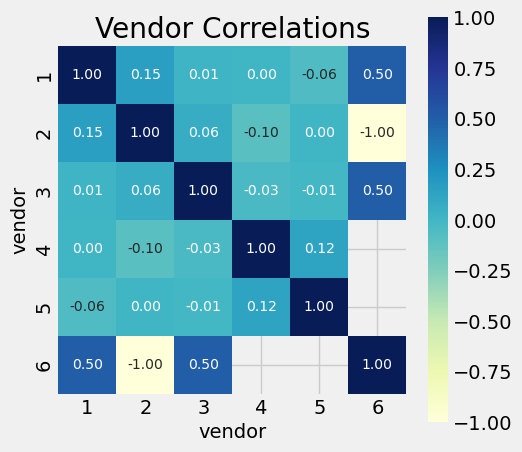

In [35]:
df2_pivot_corr = df2_pivot[[1, 2, 3, 4, 5, 6]].corr(method = 'spearman')
plt.figure(figsize = (5, 5))
sns.heatmap(df2_pivot_corr, annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Vendor Correlations')
plt.show()

In [36]:
df2_pivot_b = df2_pivot[['product_number', 1, 2]].dropna()

In [37]:
product_list = df2_pivot_b.product_number.unique().tolist()
corr_list = []

for product in product_list:
    corr_list.append(df2_pivot_b.loc[df2_pivot_b.product_number == product].corr()[1][2])
    
# nan
del corr_list[-32]

In [38]:
sum(corr_list) / len(corr_list)

0.045288962345584494

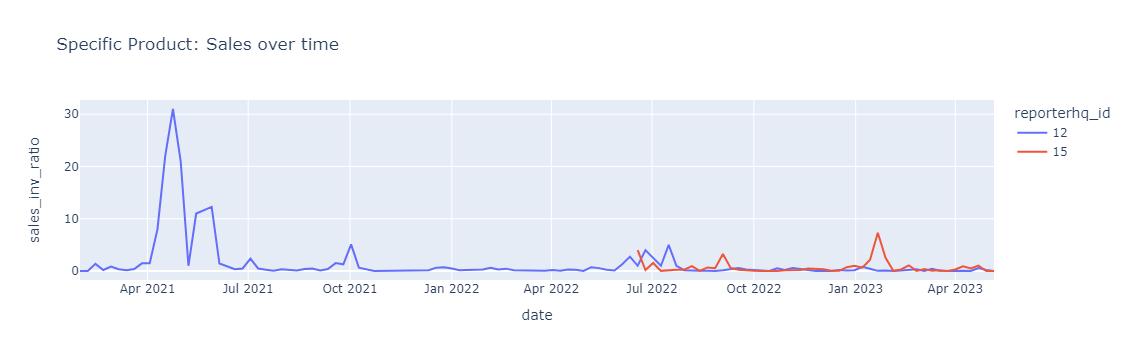

In [39]:
fig = px.line(
    df2.loc[df.product_number == 10857], 
    x = 'date', 
    y = 'sales_inv_ratio',
    color = 'reporterhq_id',
    title = 'Specific Product: Sales over time'
)

fig.show()

In [40]:
# fig = px.line(
#     df.loc[df.segment == 'Core'], 
#     x = 'date', 
#     y = 'sales_units',
#     color = 'reporterhq_id',
#     title = 'Specific Product: Sales over time'
# )

# fig.show()

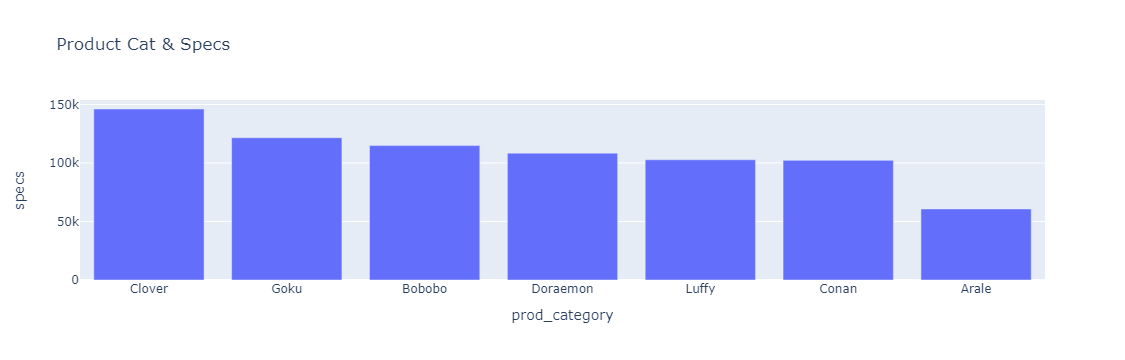

In [41]:
fig = px.bar(
    df.groupby(['prod_category'])['specs'].mean().reset_index().sort_values(by = 'specs', ascending = False), 
    x = 'prod_category', 
    y = 'specs',
    title = 'Product Cat & Specs'
)

fig.show()

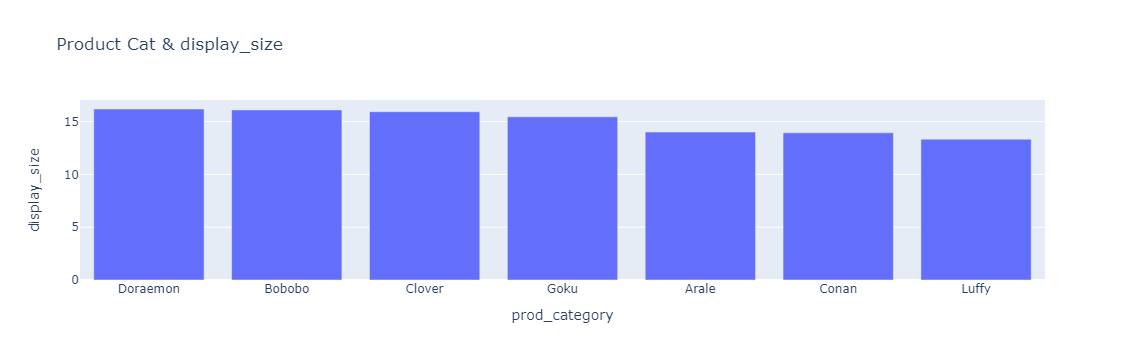

In [42]:
fig = px.bar(
    df.groupby(['prod_category'])['display_size'].mean().reset_index().sort_values(by = 'display_size', ascending = False), 
    x = 'prod_category', 
    y = 'display_size',
    title = 'Product Cat & display_size'
)

fig.show()

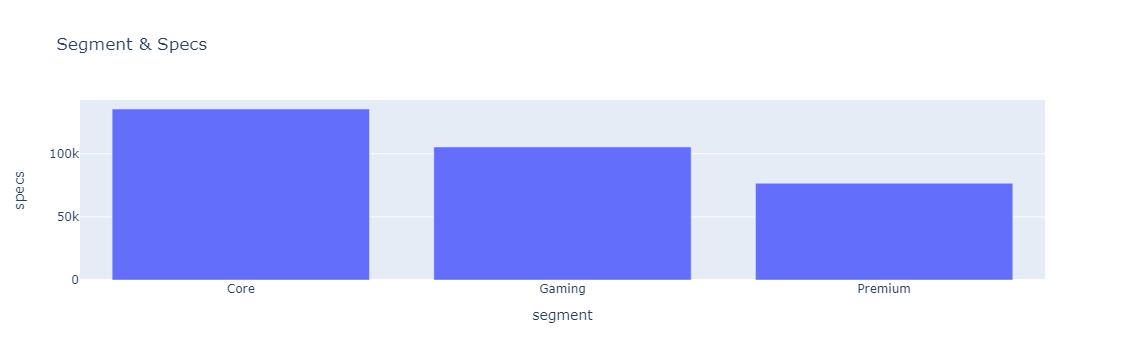

In [43]:
fig = px.bar(
    df.groupby(['segment'])['specs'].mean().reset_index().sort_values(by = 'specs', ascending = False), 
    x = 'segment', 
    y = 'specs',
    title = 'Segment & Specs'
)

fig.show()

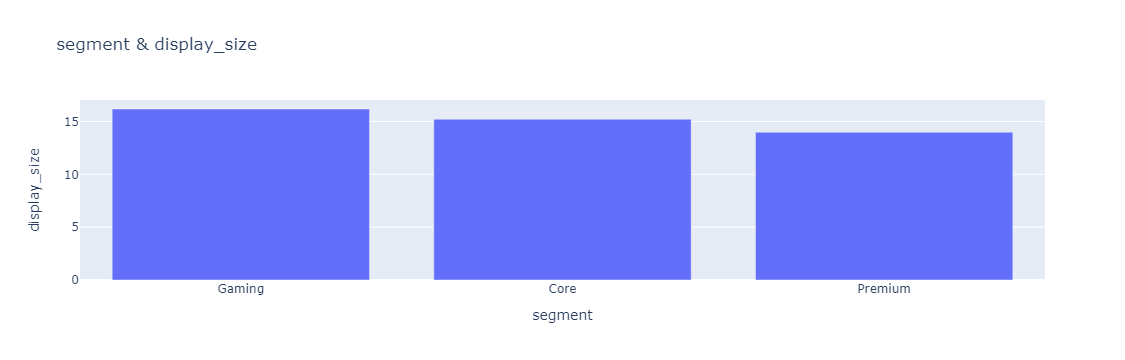

In [44]:
fig = px.bar(
    df.groupby(['segment'])['display_size'].mean().reset_index().sort_values(by = 'display_size', ascending = False), 
    x = 'segment', 
    y = 'display_size',
    title = 'segment & display_size'
)

fig.show()

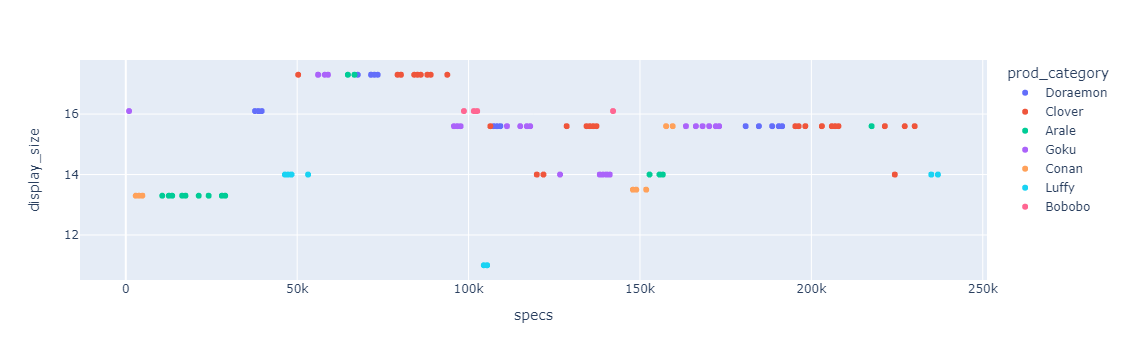

In [45]:
fig = px.scatter(
    df, 
    x = 'specs', 
    y = 'display_size',
    color = 'prod_category',
    title = ''
)

fig.show()

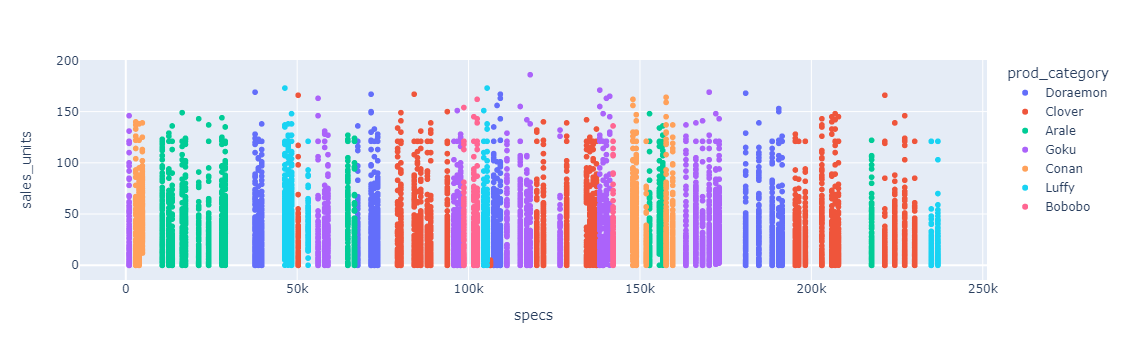

In [46]:
fig = px.scatter(
    df, 
    x = 'specs', 
    y = 'sales_units',
    color = 'prod_category',
    title = ''
)

fig.show()

In [47]:
sales_inv = df.groupby(['product_number', 'prod_category', 'segment'])['sales_units', 'inventory_units'].median().reset_index()

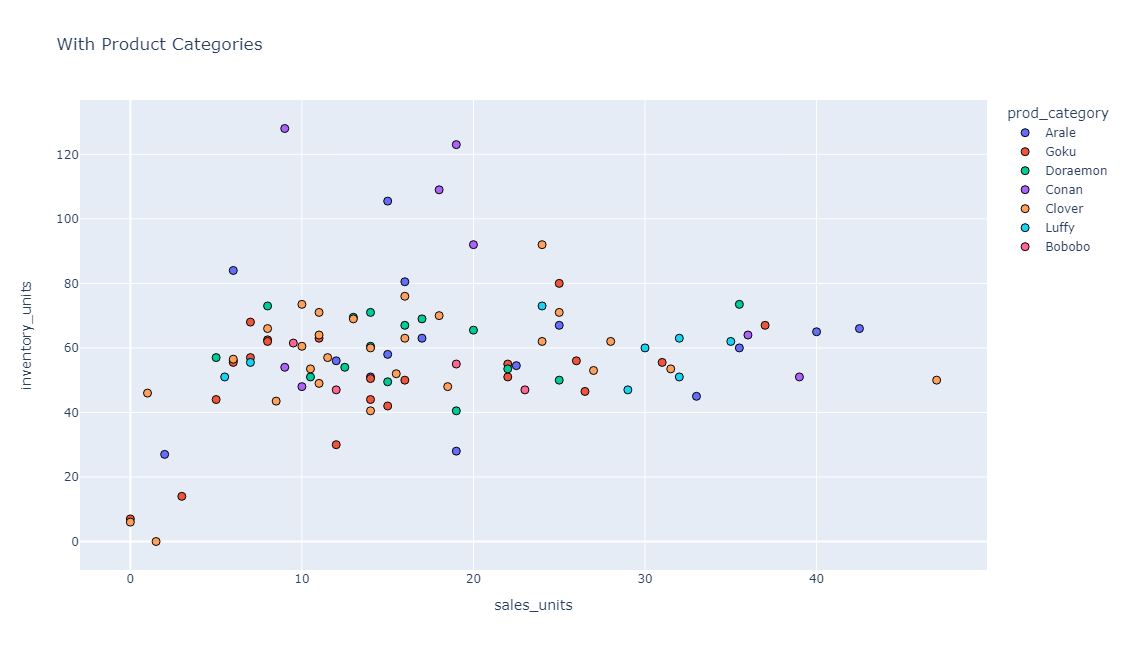

In [48]:
fig = px.scatter(
    sales_inv, 
    x = 'sales_units', 
    y = 'inventory_units',
    color = 'prod_category',
    title = 'With Product Categories'
)

fig.update_layout(
    height = 650,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.update_traces(
    marker = dict(
        size = 8,
        line = dict(
            width = 1,
            color = 'Black'
        )
    ),
    selector=dict(mode='markers')
)

fig.show()

In [49]:
sales_inv_array = sales_inv[['sales_units', 'inventory_units']].values

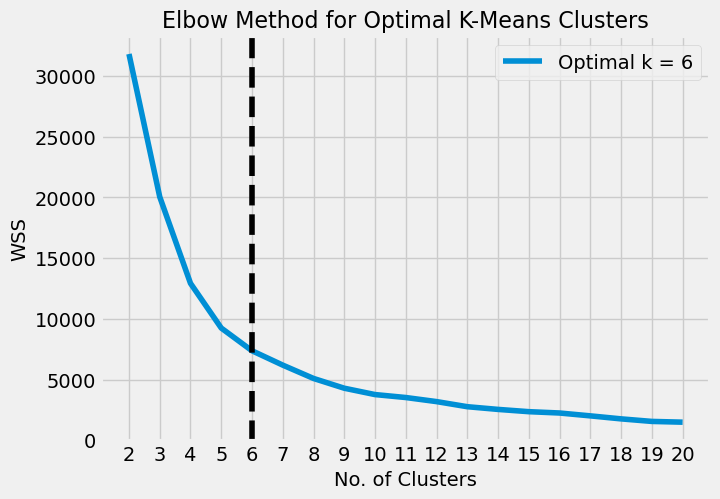

In [50]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# apply the elbow method to check the 'Within Sum of Squared Distance' and identify the the optimal k clusters to use

wss = []
n = 21

for k in range(2, n):
    kmeans = KMeans(n_clusters = k, random_state = rand_val, n_init = 'auto')
    kmeans.fit(sales_inv_array)
    wss.append(kmeans.inertia_)
    
kl = KneeLocator(range(2, n), wss, curve = 'convex', direction = 'decreasing')
elbow = kl.elbow

plt.figure(figsize = (7, 5))
plt.plot(range(2, n), wss, label = f'Optimal k = {elbow}')
plt.xticks(range(2, n))
plt.axvline(x = elbow, color = 'black', linestyle = '--')
plt.title('Elbow Method for Optimal K-Means Clusters', size = 16)
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.legend()
plt.show()

In [51]:
# Use the optimal k for applying k-means clustering to the data and have a new column with the assigned clusters

kmeans_model = KMeans(n_clusters = elbow, random_state = rand_val)
sales_inv['cluster'] = kmeans_model.fit_predict(sales_inv_array)

In [52]:
sales_inv.head()

product_number prod_category  segment  sales_units  inventory_units  \
0            6909         Arale  Premium          2.0             27.0   
1            7896          Goku     Core          7.0             68.0   
2            8883          Goku     Core          8.0             62.5   
3            9870      Doraemon   Gaming         14.0             71.0   
4           10857      Doraemon   Gaming         10.5             51.0   

   cluster  
0        1  
1        5  
2        2  
3        5  
4        2

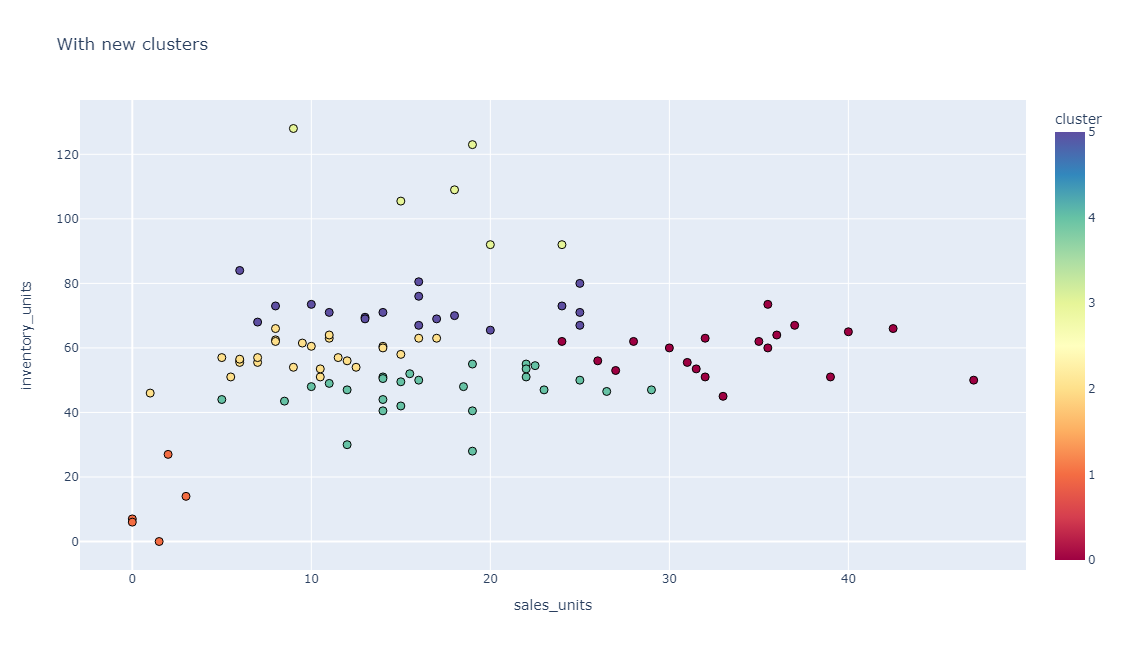

In [53]:
# import plotly.io as pio
# pio.templates.default = "plotly_white"

fig = px.scatter(
    sales_inv, 
    x = 'sales_units', 
    y = 'inventory_units',
    color = 'cluster',
    title = 'With new clusters'
)

fig.update_layout(
    height = 650,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.update_traces(
    marker = dict(
        size = 8,
        line = dict(
            width = 1,
            color = 'Black'
        )
    ),
    selector=dict(mode='markers')
)

fig.show()

In [54]:
df3 = df.merge(
    sales_inv,
    how = 'inner',
    left_on = 'product_number',
    right_on = 'product_number'
)[['date', 'product_number', 'cluster', 'sales_units_x', 'inventory_units_x']]

df3.rename(columns = {'sales_units_x': 'sales_units', 'inventory_units_x': 'inventory_units'}, inplace = True)

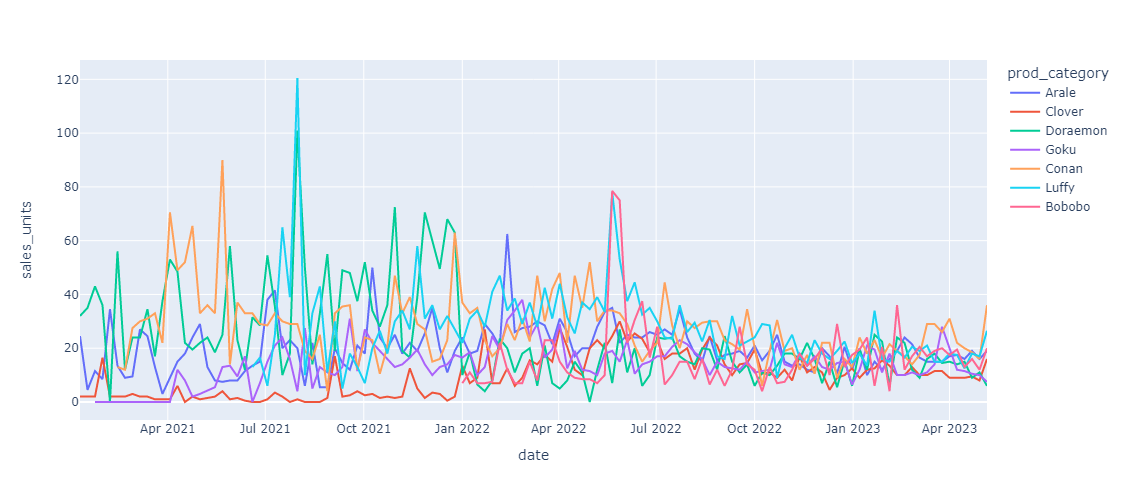

In [55]:
fig = px.line(
    df.groupby(['date', 'prod_category'])['sales_units'].median().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'prod_category',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

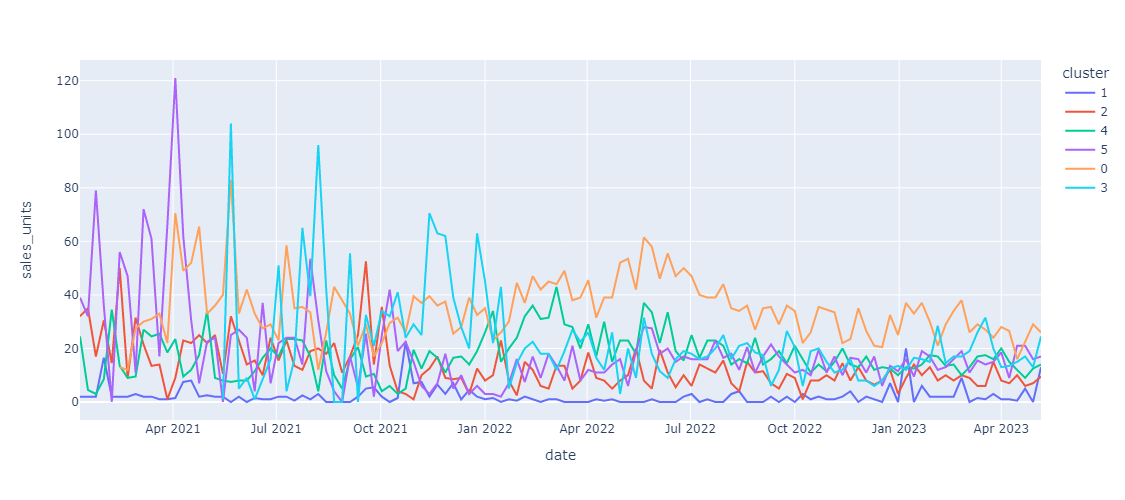

In [56]:
fig = px.line(
    df3.groupby(['date', 'cluster'])['sales_units'].median().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

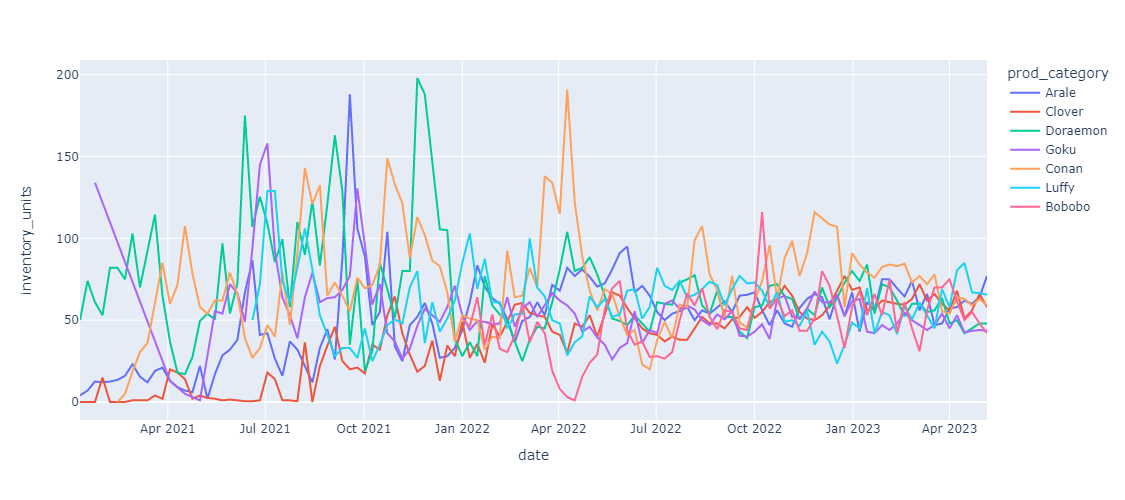

In [57]:
fig = px.line(
    df.groupby(['date', 'prod_category'])['inventory_units'].median().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'prod_category',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

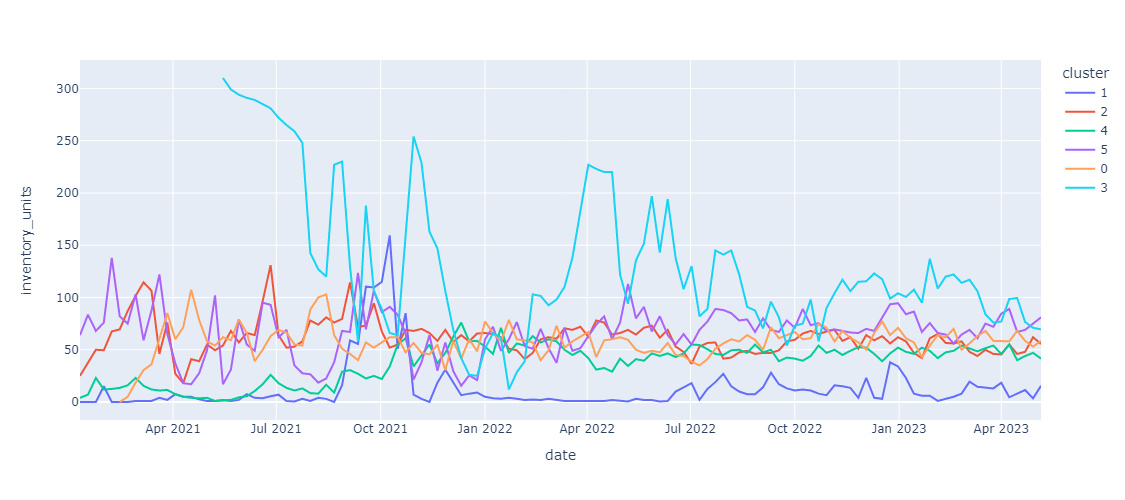

In [58]:
fig = px.line(
    df3.groupby(['date', 'cluster'])['inventory_units'].median().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

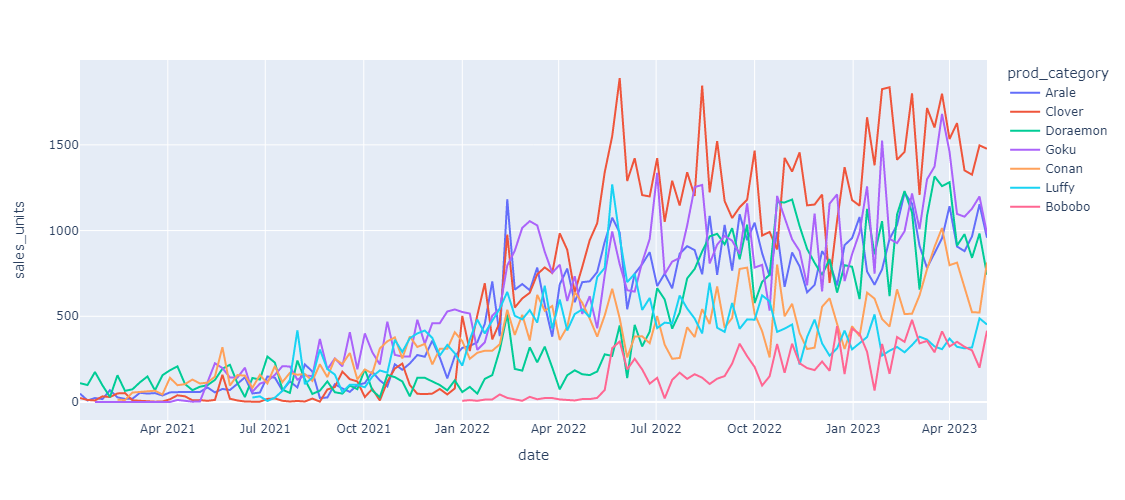

In [59]:
fig = px.line(
    df.groupby(['date', 'prod_category'])['sales_units'].sum().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'prod_category',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

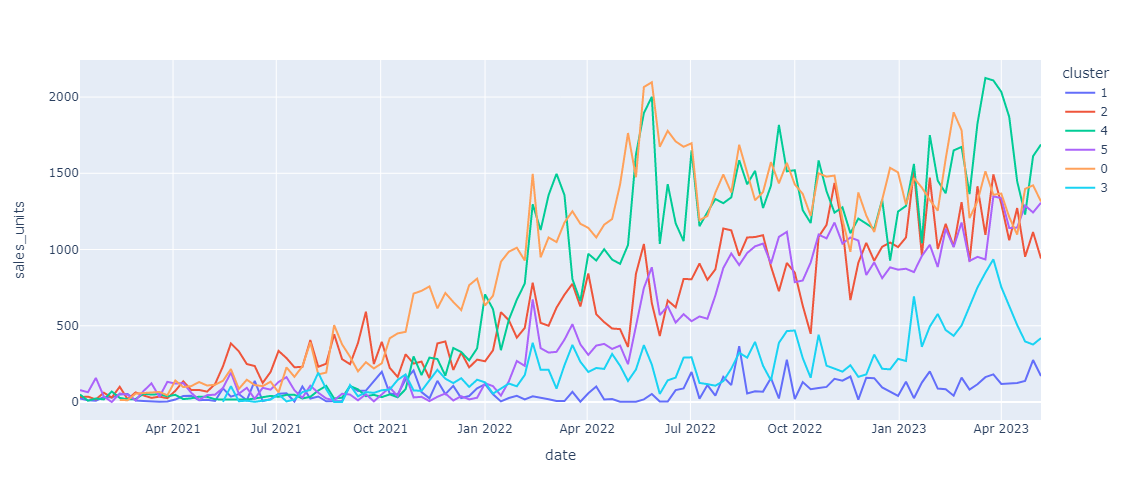

In [60]:
fig = px.line(
    df3.groupby(['date', 'cluster'])['sales_units'].sum().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

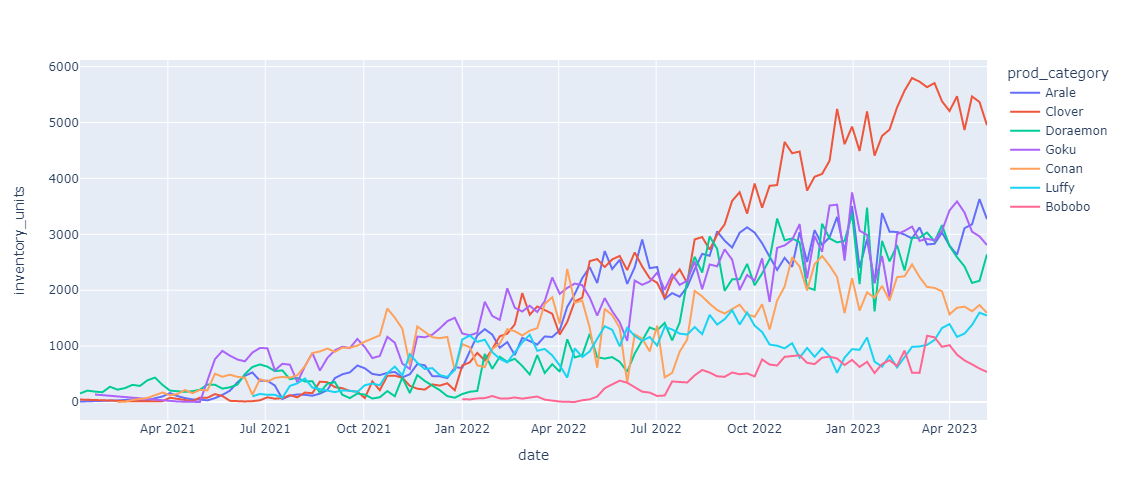

In [61]:
fig = px.line(
    df.groupby(['date', 'prod_category'])['inventory_units'].sum().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'prod_category',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

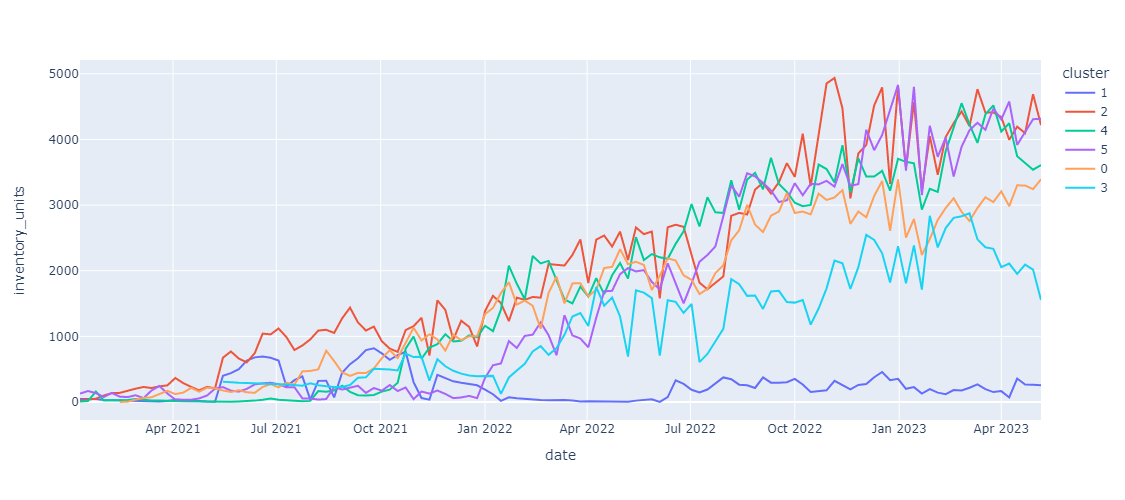

In [62]:
fig = px.line(
    df3.groupby(['date', 'cluster'])['inventory_units'].sum().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

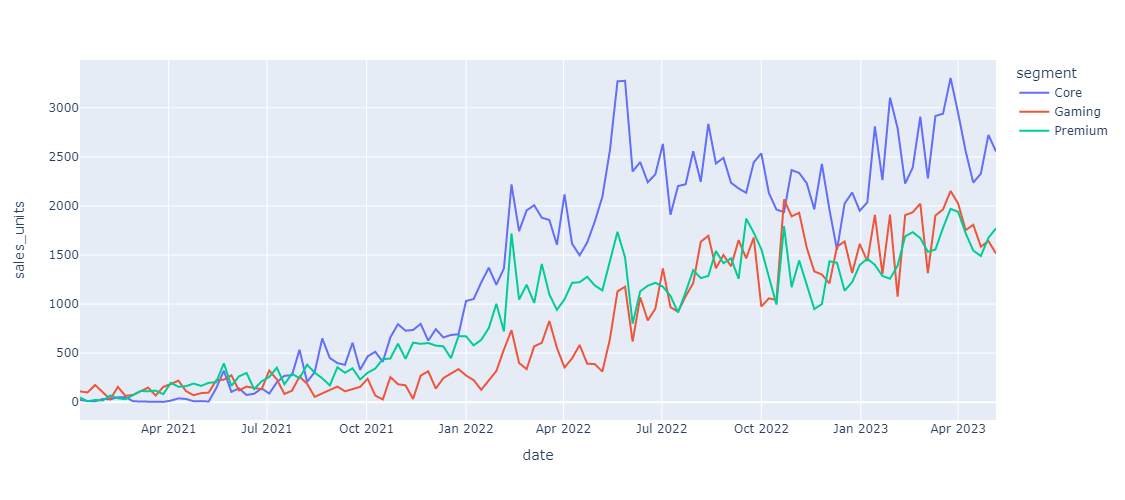

In [63]:
fig = px.line(
    df.groupby(['date', 'segment'])['sales_units'].sum().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'segment',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

In [64]:
sales_inv

product_number prod_category  segment  sales_units  inventory_units  \
0             6909         Arale  Premium          2.0             27.0   
1             7896          Goku     Core          7.0             68.0   
2             8883          Goku     Core          8.0             62.5   
3             9870      Doraemon   Gaming         14.0             71.0   
4            10857      Doraemon   Gaming         10.5             51.0   
..             ...           ...      ...          ...              ...   
95          238854          Goku     Core          8.0             62.0   
96          239841          Goku     Core          7.0             57.0   
97          240828         Conan  Premium          9.0            128.0   
98          242802         Conan  Premium          9.0             54.0   
99          247737         Arale  Premium         19.0             28.0   

    cluster  
0         1  
1         5  
2         2  
3         5  
4         2  
..      ...  
95        2  
96        2  
97        3  
98        2  
99        4  

[100 rows x 6 columns]

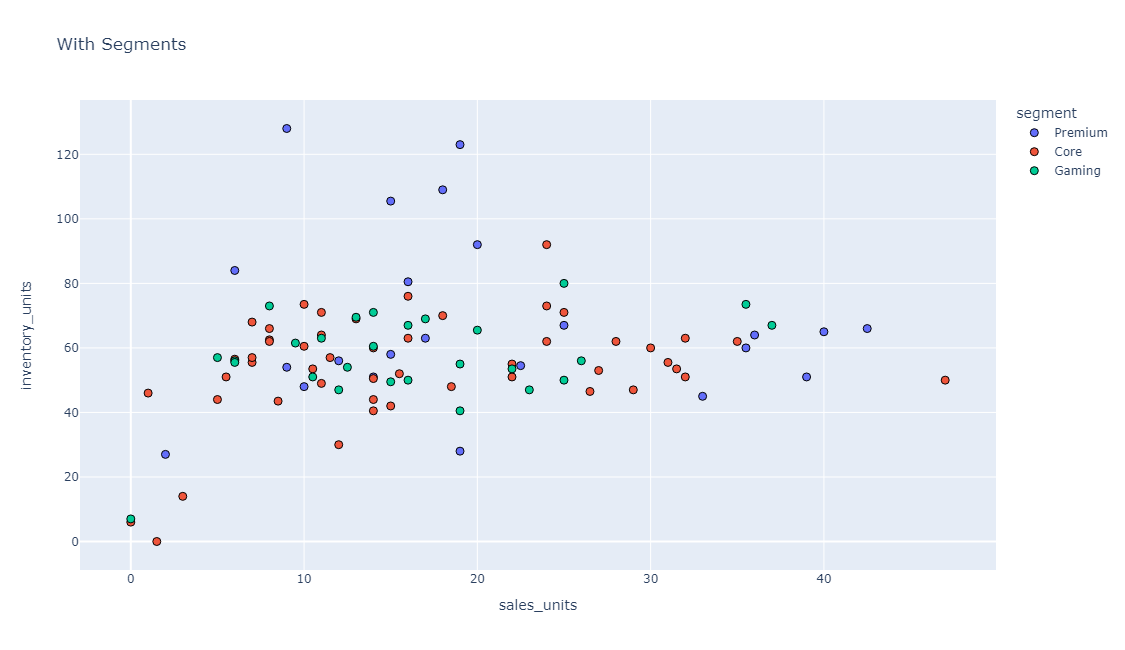

In [65]:
fig = px.scatter(
    sales_inv, 
    x = 'sales_units', 
    y = 'inventory_units',
    color = 'segment',
    title = 'With Segments'
)

fig.update_layout(
    height = 650,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.update_traces(
    marker = dict(
        size = 8,
        line = dict(
            width = 1,
            color = 'Black'
        )
    ),
    selector=dict(mode='markers')
)

fig.show()

<Axes: xlabel='sales_units', ylabel='Density'>

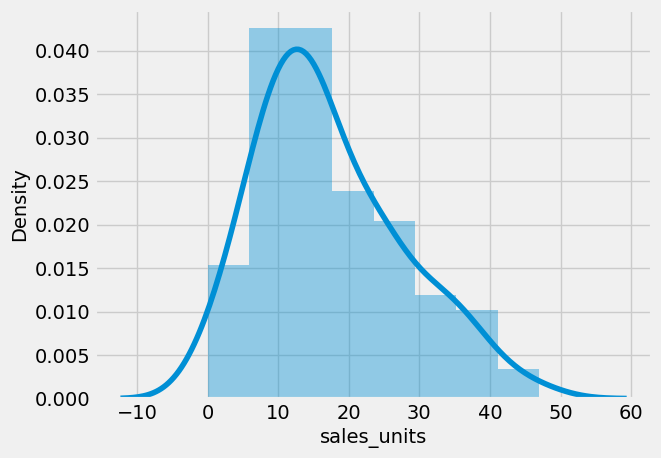

In [66]:
sns.distplot(sales_inv.sales_units)

<Axes: xlabel='inventory_units', ylabel='Density'>

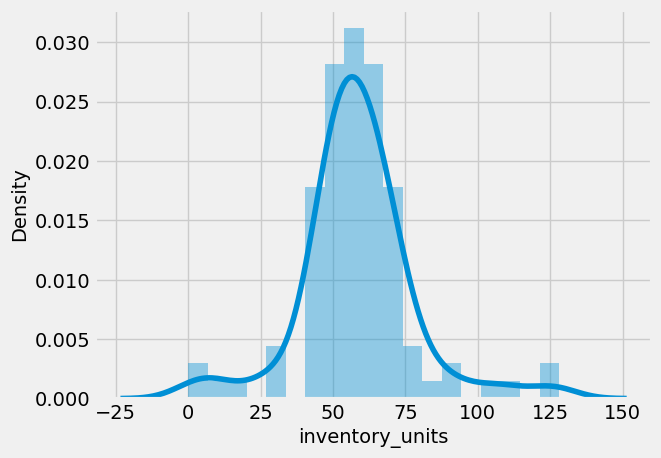

In [67]:
sns.distplot(sales_inv.inventory_units)

In [68]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [69]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

n_clusters=np.arange(2, 11)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(sales_inv_array) 
        labels=gmm.predict(sales_inv_array)
        sil=metrics.silhouette_score(sales_inv_array, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

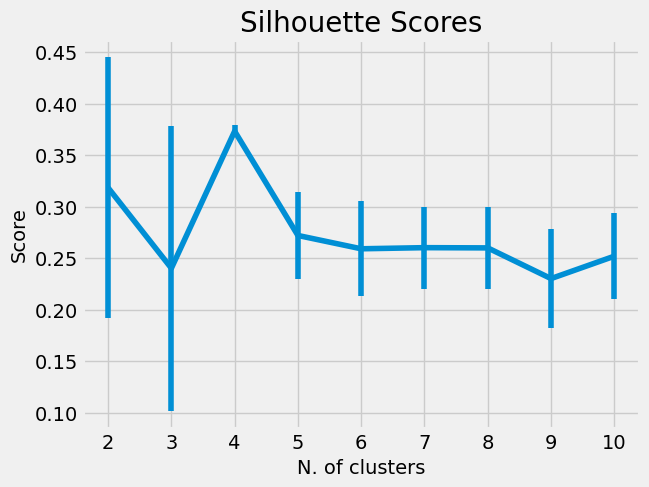

In [70]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [71]:
gmm = GaussianMixture(n_components = 4).fit(sales_inv_array)
sales_inv['gmm_cluster'] = gmm.predict(sales_inv_array)

In [72]:
fig = px.scatter(
    sales_inv, 
    x = 'sales_units', 
    y = 'inventory_units',
    color = 'gmm_cluster',
    title = 'With gmm clusters'
)

fig.update_layout(
    height = 650,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.update_traces(
    marker = dict(
        size = 8,
        line = dict(
            width = 1,
            color = 'Black'
        )
    ),
    selector=dict(mode='markers')
)

fig.show()

In [73]:
df4 = df.merge(
    sales_inv,
    how = 'inner',
    left_on = 'product_number',
    right_on = 'product_number'
)[['date', 'product_number', 'gmm_cluster', 'sales_units_x', 'inventory_units_x']]

df4.rename(columns = {'sales_units_x': 'sales_units', 'inventory_units_x': 'inventory_units'}, inplace = True)

In [74]:
fig = px.line(
    df4.groupby(['date', 'gmm_cluster'])['inventory_units'].sum().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'gmm_cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

In [75]:
fig = px.line(
    df4.groupby(['date', 'gmm_cluster'])['sales_units'].sum().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'gmm_cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

In [76]:
fig = px.line(
    df4.groupby(['date', 'gmm_cluster'])['inventory_units'].median().reset_index(), 
    x = 'date', 
    y = 'inventory_units',
    color = 'gmm_cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

In [77]:
fig = px.line(
    df4.groupby(['date', 'gmm_cluster'])['sales_units'].median().reset_index(), 
    x = 'date', 
    y = 'sales_units',
    color = 'gmm_cluster',
    title = ''
)

fig.update_layout(
    height = 500,
    coloraxis = dict( colorscale = 'Spectral')
)

fig.show()

In [78]:
sales_inv

product_number prod_category  segment  sales_units  inventory_units  \
0             6909         Arale  Premium          2.0             27.0   
1             7896          Goku     Core          7.0             68.0   
2             8883          Goku     Core          8.0             62.5   
3             9870      Doraemon   Gaming         14.0             71.0   
4            10857      Doraemon   Gaming         10.5             51.0   
..             ...           ...      ...          ...              ...   
95          238854          Goku     Core          8.0             62.0   
96          239841          Goku     Core          7.0             57.0   
97          240828         Conan  Premium          9.0            128.0   
98          242802         Conan  Premium          9.0             54.0   
99          247737         Arale  Premium         19.0             28.0   

    cluster  gmm_cluster  
0         1            0  
1         5            1  
2         2            1  
3         5            1  
4         2            1  
..      ...          ...  
95        2            1  
96        2            1  
97        3            3  
98        2            1  
99        4            0  

[100 rows x 7 columns]